In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
class Environment :
    def __init__(self,num_arms) :
        self.arms = num_arms
        self.mean_rewards = np.random.randn(self.arms)
    def step(self) :
        return self.mean_rewards + np.random.randn(self.arms)
    def action(self,a,return_isoptimal=True) :
        rewards = self.step()
        reward = rewards[a]
        isoptimal = np.argmax(self.mean_rewards) == a
        if return_isoptimal :
            return reward,isoptimal
        else :
            return reward

In [3]:
class Bandit :
    def __init__(self,num_arms) :
        self.arms = num_arms
        self.values = np.zeros(num_arms)
        self.trials = np.zeros(num_arms)
        self.curr_action = None
    def get_optimal_action(self) :
        raise NotImplementedError
    def play(self) :
        self.curr_action = self.get_optimal_action()
        return self.curr_action
    def update(self,reward) :
        self.trials[self.curr_action] += 1
        self.values[self.curr_action] += reward
        self.curr_action = None

class EpsilonBandit(Bandit) :
    def __init__(self,num_arms,epsilon) :
        super(EpsilonBandit,self).__init__(num_arms)
        self.epsilon = epsilon
    def get_optimal_action(self) :
        averages = self.values/(self.trials+1e-6)
        greedy_action = np.argmax(averages)
        if np.random.rand() > self.epsilon :
            return greedy_action
        else :
            flag = True
            while flag :
                action = np.random.choice(np.arange(self.arms))
                if action == greedy_action :
                    continue
                else :
                    return action   

class UCBBandit(Bandit) :
    def __init__(self,num_arms,c) :
        super(UCBBandit,self).__init__(num_arms)
        self.c = c
    def get_optimal_action(self) :
        averages = self.values/(self.trials+1e-6)
        averages = averages + self.c*np.sqrt(np.log(np.sum(self.trials) + 1)/(self.trials+1e-6))
        greedy_action = np.argmax(averages)
        return greedy_action


In [4]:
tasks = 2000
steps_per_task = 1000
arms = 10
epsilons = [0,0.01,0.1,0.5,0.9]
eps_value_matrix = np.zeros((len(epsilons),steps_per_task))
eps_optimal_matrix = np.zeros((len(epsilons),steps_per_task))
for k,epsilon in enumerate(epsilons) :
    value_matrix = np.zeros((tasks,steps_per_task))
    optimal_matrix = np.zeros((tasks,steps_per_task))
    actions_matrix = np.zeros((tasks,steps_per_task))
    for i in range(tasks) :
        env = Environment(arms)
        bandit = EpsilonBandit(arms,epsilon)
        for j in range(steps_per_task) :
            a = bandit.play()
            r,isopt = env.action(a)
            bandit.update(r)
            value_matrix[i,j] = r
            optimal_matrix[i,j]= isopt
            actions_matrix[i,j]=a
    eps_value_matrix[k,:] = value_matrix.mean(axis=0)
    eps_optimal_matrix[k,:] = optimal_matrix.mean(axis=0)*100

    

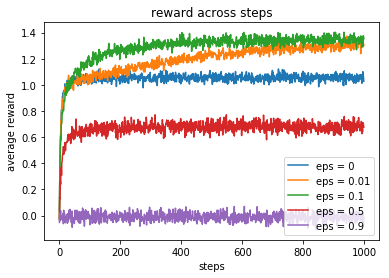

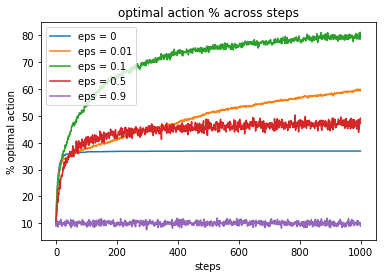

In [5]:
plt.plot(eps_value_matrix.T)
plt.title("reward across steps")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.legend(["eps = {}".format(epsilon) for epsilon in epsilons])
plt.show()

plt.plot(eps_optimal_matrix.T)
plt.title("optimal action % across steps")
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.legend(["eps = {}".format(epsilon) for epsilon in epsilons])
plt.show()


In [6]:
tasks = 2000
steps_per_task = 1000
arms = 10
epsilons = [(0,0.1),(5,0)]
eps_value_matrix = np.zeros((len(epsilons),steps_per_task))
eps_optimal_matrix = np.zeros((len(epsilons),steps_per_task))
for k,(bias,epsilon) in enumerate(epsilons) :
    value_matrix = np.zeros((tasks,steps_per_task))
    optimal_matrix = np.zeros((tasks,steps_per_task))
    actions_matrix = np.zeros((tasks,steps_per_task))
    for i in range(tasks) :
        env = Environment(arms)
        bandit = EpsilonBandit(arms,epsilon)
        bandit.values += bias
        for j in range(steps_per_task) :
            a = bandit.play()
            r,isopt = env.action(a)
            bandit.update(r)
            value_matrix[i,j] = r
            optimal_matrix[i,j]= isopt
            actions_matrix[i,j]=a
    eps_value_matrix[k,:] = value_matrix.mean(axis=0)
    eps_optimal_matrix[k,:] = optimal_matrix.mean(axis=0)*100

    

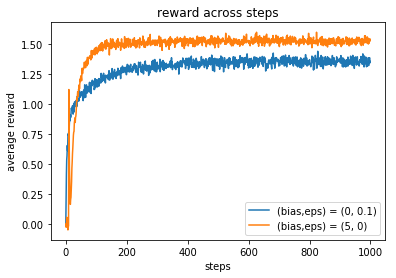

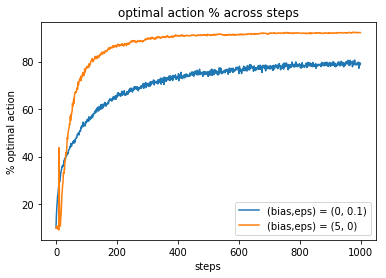

In [7]:
plt.plot(eps_value_matrix.T)
plt.title("reward across steps")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.legend(["(bias,eps) = {}".format(epsilon) for epsilon in epsilons])
plt.show()

plt.plot(eps_optimal_matrix.T)
plt.title("optimal action % across steps")
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.legend(["(bias,eps) = {}".format(epsilon) for epsilon in epsilons])
plt.show()


In [8]:
tasks = 2000
steps_per_task = 1000
arms = 10
epsilons = [0,0.1,1,2,10]
eps_value_matrix = np.zeros((len(epsilons),steps_per_task))
eps_optimal_matrix = np.zeros((len(epsilons),steps_per_task))
for k,epsilon in enumerate(epsilons) :
    value_matrix = np.zeros((tasks,steps_per_task))
    optimal_matrix = np.zeros((tasks,steps_per_task))
    actions_matrix = np.zeros((tasks,steps_per_task))
    for i in range(tasks) :
        env = Environment(arms)
        bandit = UCBBandit(arms,epsilon)
        for j in range(steps_per_task) :
            a = bandit.play()
            r,isopt = env.action(a)
            bandit.update(r)
            value_matrix[i,j] = r
            optimal_matrix[i,j]= isopt
            actions_matrix[i,j]=a
    eps_value_matrix[k,:] = value_matrix.mean(axis=0)
    eps_optimal_matrix[k,:] = optimal_matrix.mean(axis=0)*100

    

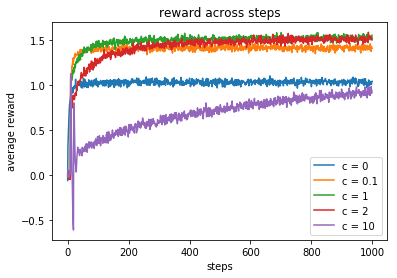

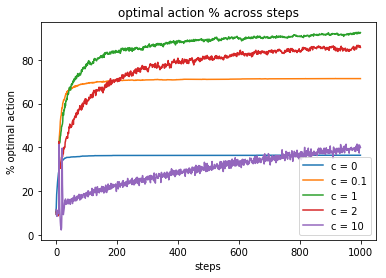

In [9]:
plt.plot(eps_value_matrix.T)
plt.title("reward across steps")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.legend(["c = {}".format(epsilon) for epsilon in epsilons])
plt.show()

plt.plot(eps_optimal_matrix.T)
plt.title("optimal action % across steps")
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.legend(["c = {}".format(epsilon) for epsilon in epsilons])
plt.show()
